In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('chokepoint_2025.csv')

In [3]:
df=pd.read_csv('chokepoint_2025.csv')
df['date']=pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df=df[df['portname']=='Suez Canal']
#df=df[(df['date']>='2020-01-01')&(df['date']<='2025-02-09')].reset_index().drop('index',axis=1)

In [4]:
df

,date,year,month,day,portid,portname,n_container,n_dry_bulk,n_general_cargo,n_roro,...,n_cargo,n_total,capacity_container,capacity_dry_bulk,capacity_general_cargo,capacity_roro,capacity_tanker,capacity_cargo,capacity,ObjectId
0,2019-01-01,2019,1,1,chokepoint1,Suez Canal,21,24,17,5,...,67,89,1.089470e+06,9.051440e+05,135760.142456,21022.019435,1.191096e+06,2.151396e+06,3.342492e+06,1
1,2019-01-02,2019,1,2,chokepoint1,Suez Canal,22,6,8,7,...,43,52,1.505460e+06,3.235757e+05,7951.163188,55181.181876,4.554950e+05,1.892168e+06,2.347663e+06,2
2,2019-01-03,2019,1,3,chokepoint1,Suez Canal,12,17,9,3,...,41,62,4.743254e+05,1.109482e+06,35746.520070,23785.885290,5.717003e+05,1.643340e+06,2.215040e+06,3
3,2019-01-04,2019,1,4,chokepoint1,Suez Canal,18,11,2,1,...,32,47,1.118255e+06,4.216106e+05,0.000000,7595.724839,7.139619e+05,1.547461e+06,2.261423e+06,4
4,2019-01-05,2019,1,5,chokepoint1,Suez Canal,20,8,2,1,...,31,44,1.305583e+06,7.112837e+05,17053.275000,8758.480096,6.389953e+05,2.042679e+06,2.681674e+06,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2025-01-04,2025,1,4,chokepoint1,Suez Canal,6,9,5,0,...,20,29,1.399886e+05,4.686452e+05,6635.234646,0.000000,2.323701e+05,6.152690e+05,8.476392e+05,2396
2396,2025-01-05,2025,1,5,chokepoint1,Suez Canal,8,3,6,1,...,18,30,3.023797e+05,8.590534e+04,5420.184850,0.000000,6.804545e+05,3.937052e+05,1.074160e+06,2397
2397,2025-01-06,2025,1,6,chokepoint1,Suez Canal,13,20,5,1,...,39,55,3.057893e+05,7.413007e+05,1441.612810,7376.505542,6.950078e+05,1.055908e+06,1.750916e+06,2398
2398,2025-01-07,2025,1,7,chokepoint1,Suez Canal,8,12,4,0,...,24,41,1.019538e+05,5.108506e+05,29946.088653,0.000000,1.018729e+06,6.427505e+05,1.661480e+06,2399


In [5]:
df=df[['date','n_total']]
df=df.groupby('date').sum().reset_index()
df.set_index('date', inplace=True)
df

,n_total
date,
2019-01-01,89
2019-01-02,52
2019-01-03,62
2019-01-04,47
2019-01-05,44
...,...
2025-02-05,32
2025-02-06,30
2025-02-07,30


Text(0.5, 1.0, 'Original Data')

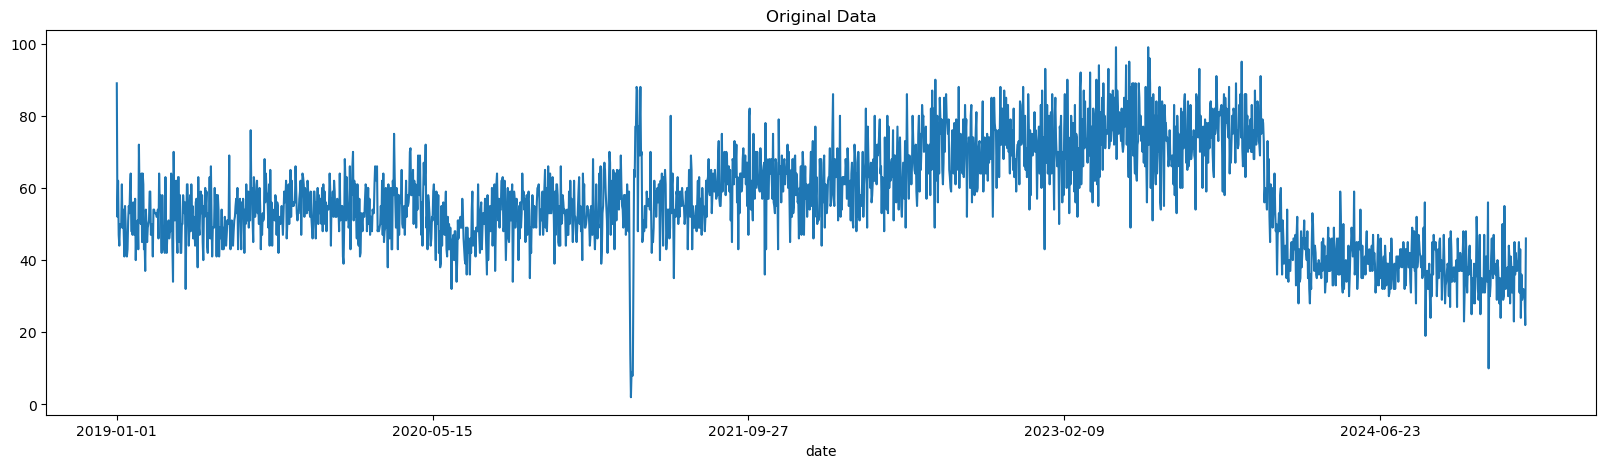

In [6]:
df['n_total'].plot(figsize=(20,5))
plt.title('Original Data')

In [7]:
res = adfuller(df['n_total'])
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -1.137527
p-value: 0.699877
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


#### Here p>0.05; hence data is non stationary

In [9]:
# Making the data stationary
# Differencing the data
df_diff = df.diff().dropna()
df_diff

,n_total
date,
2019-01-02,-37.0
2019-01-03,10.0
2019-01-04,-15.0
2019-01-05,-3.0
2019-01-06,6.0
...,...
2025-02-05,2.0
2025-02-06,-2.0
2025-02-07,0.0


Text(0.5, 1.0, 'Differenced Data')

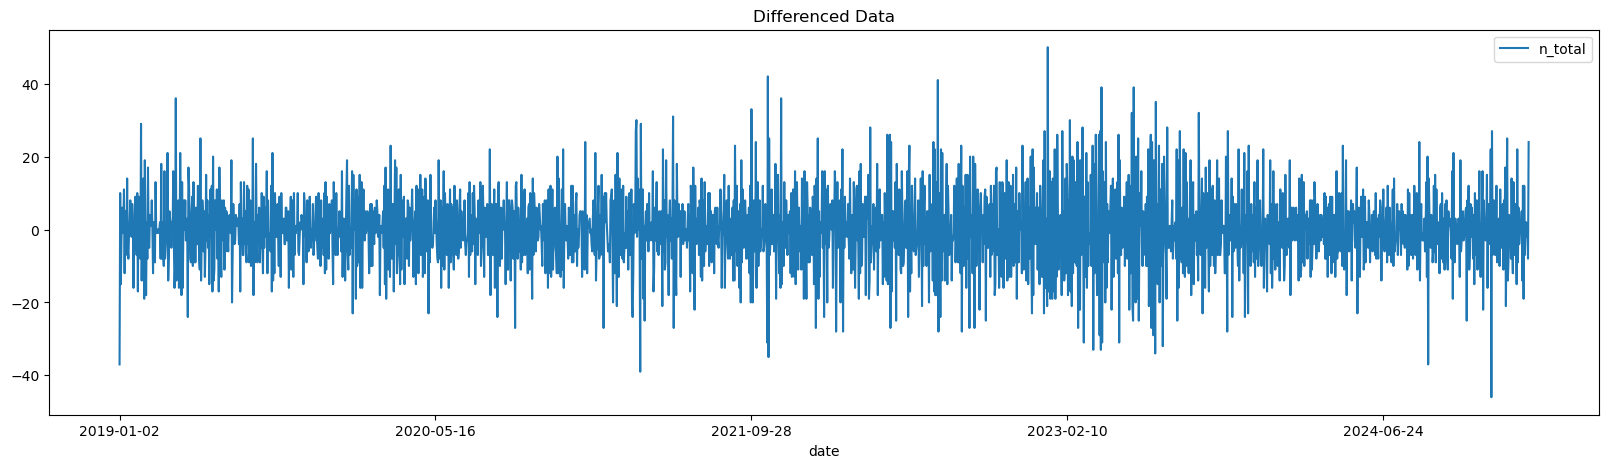

In [10]:
# Plot the differenced data
df_diff.plot(figsize=(20,5))
plt.title('Differenced Data')

In [11]:
res = adfuller(df_diff['n_total'])
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -15.222875
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


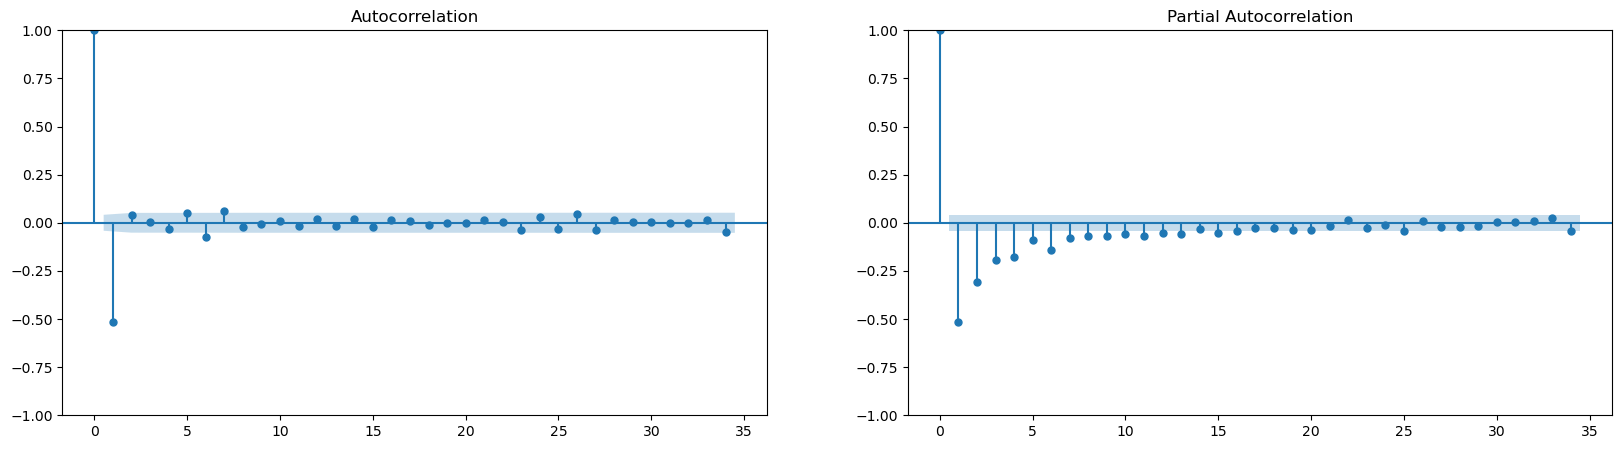

In [12]:
# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
plot_acf(df_diff, ax=axes[0])
plot_pacf(df_diff, ax=axes[1])
plt.show()

In [13]:
#divide into 80% train and 20% validation set
train=df[:int(0.8*(len(df)))]
test=df[int(0.8*(len(df))):]

In [14]:
model = auto_arima(df, trace=True, error_action='ignore', suppress_warnings=True)
# Print the summary of the model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15744.499, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17029.476, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16331.244, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15755.084, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17027.483, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15758.770, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15745.519, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15742.905, Time=0.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15743.927, Time=0.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=15744.838, Time=0.80 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=15744.724, Time=1.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15756.939, Time=1.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=15745.904, Time=0.44 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=15744.981, Time=1.11 sec
 ARIMA(3,1,2)(0,0,0

In [15]:
#train=train.reset_index()
#train
train

,n_total
date,
2019-01-01,89
2019-01-02,52
2019-01-03,62
2019-01-04,47
2019-01-05,44
...,...
2023-11-16,74
2023-11-17,95
2023-11-18,71


In [16]:
val=train['n_total'][-1]
val

70

In [17]:
len(test)

447

In [18]:
test

,n_total
date,
2023-11-21,70
2023-11-22,86
2023-11-23,63
2023-11-24,86
2023-11-25,77
...,...
2025-02-05,32
2025-02-06,30
2025-02-07,30


In [19]:
# Ensure the index is a DatetimeIndex
#if not isinstance(train.index, pd.DatetimeIndex):
 #   train['date'] = pd.to_datetime(train['date'])
  #  train.set_index('date', inplace=True)
model.fit(train.diff())
# Forecasting
n_periods = len(test)  # Number of periods to forecast
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Create a date range for the forecast
forecast_index = pd.date_range(start='2023-11-21',end='2025-02-09')#(start=train.index[-1] + pd.DateOffset(day=1), periods=n_periods, freq='d')
forecast_series = pd.DataFrame(forecast,index = forecast_index,columns=['Prediction'])

In [20]:
#forecast_series['Actual']=list(test['n_total'])
#forecast_series=forecast_series.dropna()
forecast_series

,Prediction
2023-11-21,5.997507
2023-11-22,0.074331
2023-11-23,0.057688
2023-11-24,-0.214127
2023-11-25,0.019309
...,...
2025-02-05,0.010479
2025-02-06,0.010479
2025-02-07,0.010479
2025-02-08,0.010479


In [21]:
actual=[]
corr=val

for i in range(len(forecast_series)):
    a=forecast_series['Prediction'][i]+corr
    actual.append(a)
    corr=a

In [22]:
test['Prediction']=actual

C:\Users\ANT-PC\AppData\Local\Temp\ipykernel_18208\2673052648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction']=actual


In [23]:
test

,n_total,Prediction
date,,
2023-11-21,70,75.997507
2023-11-22,86,76.071837
2023-11-23,63,76.129525
2023-11-24,86,75.915398
2023-11-25,77,75.934707
...,...,...
2025-02-05,32,80.523496
2025-02-06,30,80.533976
2025-02-07,30,80.544455


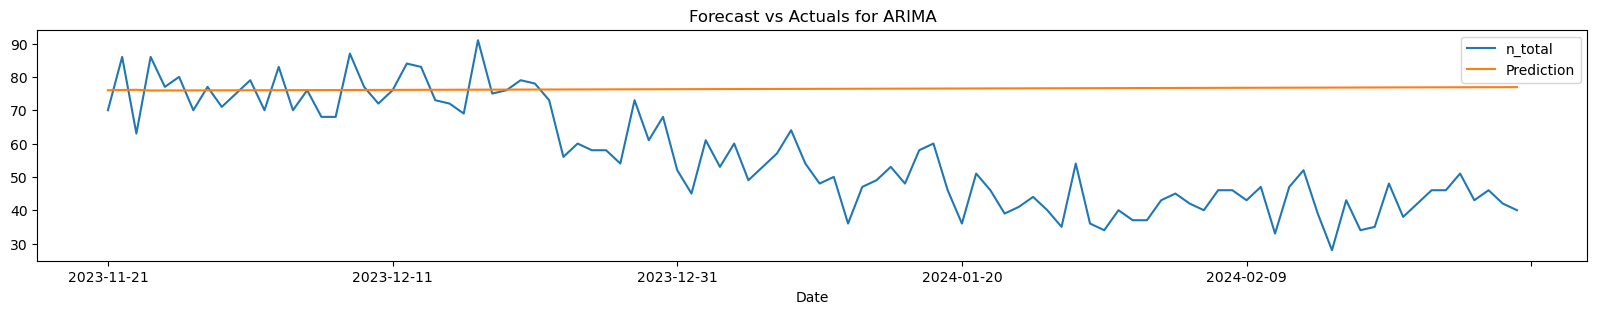

In [79]:
# Plot the results
fig=plt.figure(figsize=(20,3))
ax=fig.add_subplot(111)
#plt.plot(test[:100], label='Historical Data')
#plt.plot(forecast_series[:100], label='Forecast', color='red')
test[:100].plot(ax=ax)
#.plot(ax=ax)
plt.title('Forecast vs Actuals for ARIMA')
plt.xlabel('Date')
#plt.ylabel('Vessel Traffic')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, mean_absolute_percentage_error

# Calculate metrics
mae = mean_absolute_error(test['n_total'], test['Prediction'])
mse = mean_squared_error(test['n_total'], test['Prediction'])
rmse = np.sqrt(mse)
MAPE=mean_absolute_percentage_error(test['n_total'], test['Prediction'])
#r2 = r2_score(test['Total'], test['Predictions'])
#f1 = f1_score(test['Total'], test['Predictions'])
#acc = accuracy_score(test['Total'], test['Predictions'])
# Print metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
#print(f'Mean Absolute Percentage Error: {round(MAPE*100,2)}%')

Mean Absolute Error: 36.29988747447036
Mean Squared Error: 1458.916130099888
Root Mean Squared Error: 38.1957606299428


In [26]:
# Fit the model
#model = auto_arima(df['Passengers'], 
 #                  seasonal=True,  # STrue if data has a seasonal component
  ##                trace=True,     # Print the progress
    #               error_action='ignore',  # Ignore errors
     ##             stepwise=True)  # Stepwise model selection
#model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
# Print the summary of the model
#print(model.summary())

In [27]:
model = auto_arima(df, trace=True, error_action='ignore', suppress_warnings=True)
# Print the summary of the model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15744.499, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17029.476, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16331.244, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15755.084, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17027.483, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15758.770, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15745.519, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15742.905, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15743.927, Time=0.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=15744.838, Time=0.78 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=15744.724, Time=1.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15756.939, Time=1.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=15745.904, Time=0.43 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=15744.981, Time=1.12 sec
 ARIMA(3,1,2)(0,0,0

In [28]:
df=df.reset_index()
df

,date,n_total
0,2019-01-01,89
1,2019-01-02,52
2,2019-01-03,62
3,2019-01-04,47
4,2019-01-05,44
...,...,...
2227,2025-02-05,32
2228,2025-02-06,30
2229,2025-02-07,30
2230,2025-02-08,22


In [29]:
df.index[-1]

2231

In [30]:
# Ensure the index is a DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

# Forecasting
n_periods = 39  # Number of periods to forecast
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Create a date range for the forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(day=1), periods=n_periods, freq='d')
forecast_series = pd.Series(forecast, index=forecast_index)

In [31]:
forecast_series=forecast_series.dropna()

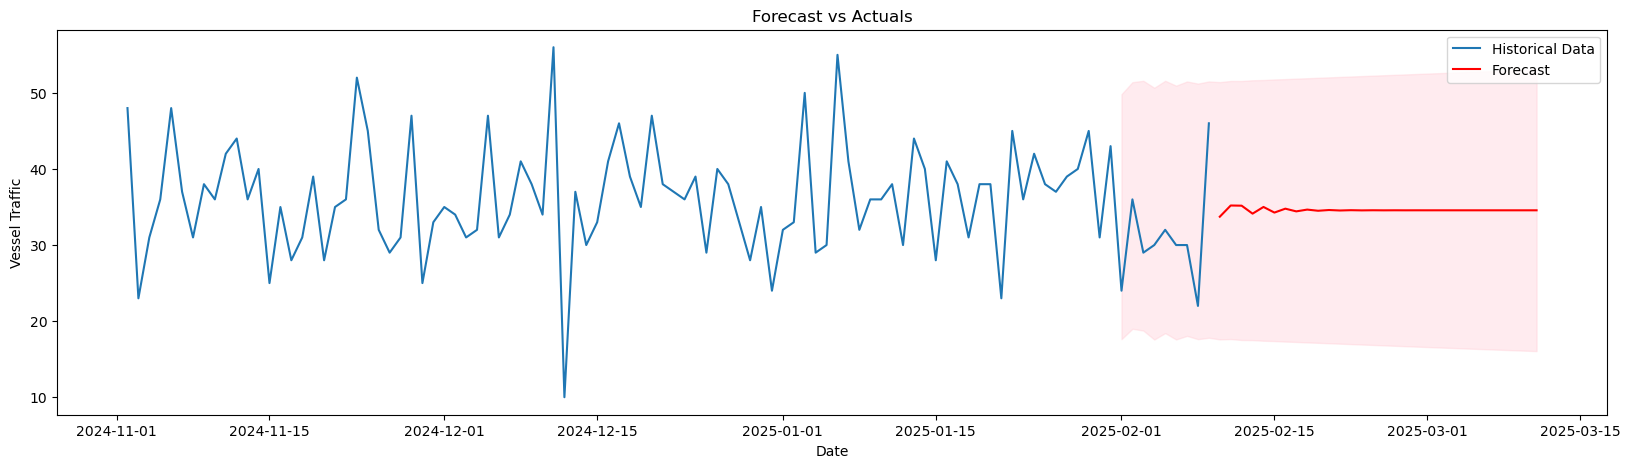

In [32]:
# Plot the results
plt.figure(figsize=(20,5))
plt.plot(df[-100:], label='Historical Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Vessel Traffic')
plt.legend()
plt.show()

In [33]:
forecast_series.mean()

34.57383035610585